|name|student number|
|---|---|
|Sam Lamboo|s2653346|

# Exercise 3: Determining the gravitational constant

We try to determine the gravitational constant $g$ from an experiment. In the experiment a small metal sphere is released from an adjustable height $h$ and the time to reach the ground is recorded. The sphere is held in place by an electro-magnet and is dropped at time $t = 0$ using a switch that simultaneously starts a measurement of the time. The measurement is stopped when the sphere reaches the ground and thus the time is recorded. There are possible delays in both the moment that the electro-magnet releases the ball and the starting and stopping of the time recording device. 

Repeated measurements for different initial heights result in a set of data that we can compare to the known relation 

$$h = \frac{1}{2} g t^2$$

to determine $g$. We assume that errors in the height are negligible and that a measurement of the time is accurate to 0.01 sec (standard deviation).

The data is stored in the file [timeandheight.dat](timeandheight.dat) and is in comma separated format. We will first read in the data using the numpy loadtxt function.

In [1]:
import numpy as np

t, h = np.loadtxt('timeandheight.dat', delimiter=',', skiprows=5, usecols=(0, 1), unpack=True)
# time is in seconds, height is in meters

for i in range(len(t)):
    print('h = %4.3f m \t t = %4.3f +/- 0.01 s' % (h[i],t[i]))


h = 0.200 m 	 t = 0.160 +/- 0.01 s
h = 1.000 m 	 t = 0.400 +/- 0.01 s
h = 2.000 m 	 t = 0.580 +/- 0.01 s
h = 3.000 m 	 t = 0.720 +/- 0.01 s
h = 5.000 m 	 t = 0.970 +/- 0.01 s


Assume that the sphere really starts to fall at $t = 0$, i.e. that the magnet releases the ball as soon as the button is pressed.

### a) Determine a best estimate (weighted average) of the gravitational constant $g$ and an error bar without using a curve-fit or optimization routine.

It could be useful to use a formula to propagate the error or uncertainty in the time measurement. See https://en.wikipedia.org/wiki/Propagation_of_uncertainty

In [2]:
def calculate_g(h, t):
    """Calculate the gravitational constant g from height and time data.
    
    parameters
    ----------
    h : float or np.ndarray
        Height in meters.
    t : float or np.ndarray
        Time in seconds.
    
    returns
    -------
    float or np.ndarray
        Calculated gravitational constant g in m/s^2.
    """
    return 2 * h / (t ** 2)

def calculate_g_error(h, t, t_error):
    """Calculate the uncertainty in g based on the uncertainty in time.
    
    parameters
    ----------
    h : float or np.ndarray
        Height in meters.
    t : float or np.ndarray
        Time in seconds.
    t_error : float or np.ndarray
        Uncertainty on t in seconds.
    
    returns
    -------
    float or np.ndarray
        Uncertainty in g in m/s^2.
    """
    return np.sqrt((4 * h / (t ** 3)) ** 2 * (t_error ** 2))

We will first calculate the values of g for each of the measurements along with the propegated error for each.

In [3]:
g = calculate_g(h, t)
g_error = calculate_g_error(h, t, 0.01)

for i in range(len(g)):
    print(f"g = ({g[i]:.1f} ± {g_error[i]:.1f}) m/s²")

g = (15.6 ± 2.0) m/s²
g = (12.5 ± 0.6) m/s²
g = (11.9 ± 0.4) m/s²
g = (11.6 ± 0.3) m/s²
g = (10.6 ± 0.2) m/s²


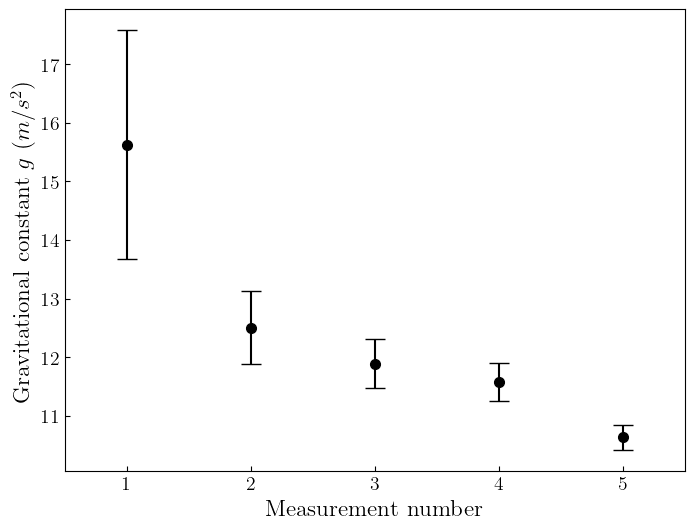

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Font parameter setting code modified from code provided by Dr. M.J.A. de Dood
SMALL_SIZE = 10*np.sqrt(2)
MEDIUM_SIZE = 12*np.sqrt(2)
BIGGER_SIZE = 14*np.sqrt(2)

plt.rc('font', size=SMALL_SIZE, family='serif')
plt.rc('text', usetex=True)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)
plt.rc('figure', figsize='8, 6')

x = np.arange(1, 6, 1)

fig, ax = plt.subplots()
ax.errorbar(
    x, 
    g,
    yerr=g_error,
    ls='None',
    c='k',
    marker='o',
    markersize=7,
    capsize=7,
)
ax.set_xlabel("Measurement number")
ax.set_ylabel("Gravitational constant $g$ ($m/s^2$)")
ax.set_xticks(x)
ax.set_xlim(0.5, 5.5)
plt.show()

average g = (11.2 ± 0.2) m/s²


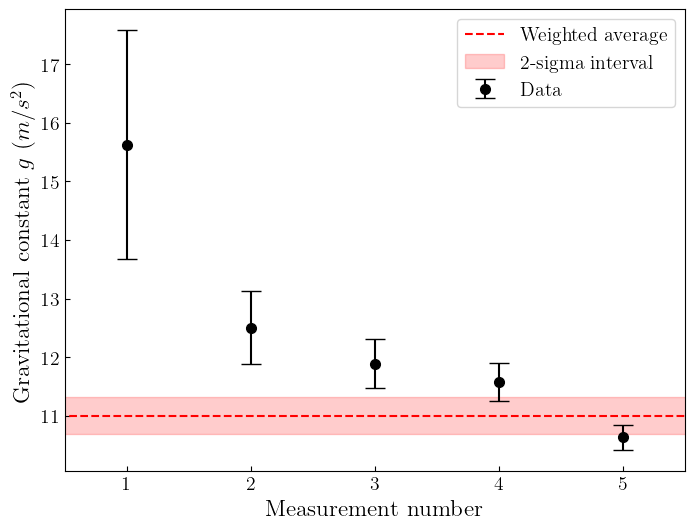

In [5]:
g_avg = np.average(g, weights=1/g_error**2)
g_avg_error = np.sqrt(1/np.sum(1/g_error**2))

print(f"average g = ({g_avg:.1f} ± {g_avg_error:.1f}) m/s²")

fig, ax = plt.subplots()
ax.errorbar(
    x, 
    g,
    yerr=g_error,
    ls='None',
    c='k',
    marker='o',
    markersize=7,
    capsize=7,
    label='Data'
)

xx = np.array([0, 6])
y = np.full_like(xx, g_avg)
ax.plot(xx, y, ls='--', c='r', label='Weighted average')
ax.fill_between(xx, y - g_avg_error * 2, y + g_avg_error * 2, 
                color='r',
                alpha=0.2,
                label='2-sigma interval',
                )

ax.set_xlabel("Measurement number")
ax.set_ylabel("Gravitational constant $g$ ($m/s^2$)")
ax.set_xticks(x)
ax.set_xlim(0.5, 5.5)
ax.legend()

plt.show()

### b) Repeat the exercise, but use a curve-fitting tool or least-squares optimization to find a best fit. What is the estimated error on the gravitational constant?

In [11]:
from scipy.optimize import curve_fit

def g_model(h, g):
    """Calculate the time of a free fall from height h under acceleration g.
    
    parameters
    ----------
    h : float or np.ndarray
        Height in meters.
    g : float
        Gravitational constant in m/s^2.
    
    returns
    -------
    float or np.ndarray
        Height in meters.
    """
    t = np.sqrt(2 * h / g)
    return t

popt, pcov = curve_fit(g_model, h, t, sigma=0.01)
g_fit = popt[0]
g_fit_error = np.sqrt(pcov[0, 0])

print(f"Fitted g = ({g_fit:.1f} ± {g_fit_error:.1f}) m/s²")

Fitted g = (11.3 ± 0.4) m/s²


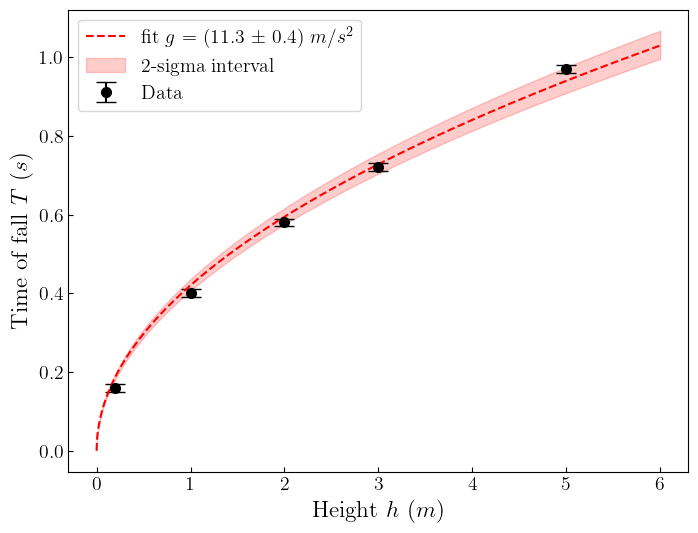

In [18]:
fig, ax = plt.subplots()
ax.errorbar(
    h,
    t,
    yerr=0.01,
    ls='None',
    c='k',
    marker='o',
    markersize=7,
    capsize=7,
    label='Data'
)

h_fit = np.linspace(0, 6, 1000)
ax.plot(h_fit, g_model(h_fit, g_fit), ls='--', c='r', 
        label=f"fit $g$ = ({g_fit:.1f} ± {g_fit_error:.1f}) $m/s^2$")

nstd = 2
t_upper = g_model(h_fit, g_fit + g_fit_error * nstd)
t_lower = g_model(h_fit, g_fit - g_fit_error * nstd)

ax.fill_between(h_fit, t_lower, t_upper,
                color='r',
                alpha=0.2,
                label=f'{nstd}-sigma interval',
                )

ax.set_xlabel("Height $h$ ($m$)")
ax.set_ylabel("Time of fall $T$ ($s$)")
ax.legend()

plt.show()


The assumption that the ball is released when the button is pressed is not realistic. It usually takes some time for the currents to reach zero. Take this effect into account in your data analysis by introducing an unknown time delay. 

### c) What is the best estimate for the  value of the gravitational constant and what is the error bar in this case?

In [34]:
def g_model_improved(h, g, t0):
    """Calculate the time of a free fall from height h under acceleration g, 
    including a time offset t0.
    
    parameters
    ----------
    h : float or np.ndarray
        Height in meters.
    g : float
        Gravitational constant in m/s^2.
    t0 : float
        Time delay in seconds.
    
    returns
    -------
    float or np.ndarray
        Time of fall in seconds.
    """
    t = np.sqrt(2 * h / g) - t0
    return t

popt, pcov = curve_fit(g_model_improved, h, t, sigma=0.01)
g_fit = popt[0]
g_fit_error = np.sqrt(pcov[0, 0])
perr = np.sqrt(np.diag(pcov))

print(f"Fitted g = ({g_fit:.1f} ± {g_fit_error:.1f}) m/s²")
print(f"Fitted time delay T0 = ({popt[1]:.2f} ± {perr[1]:.2f}) s")

Fitted g = (9.9 ± 0.4) m/s²
Fitted time delay T0 = (0.05 ± 0.01) s


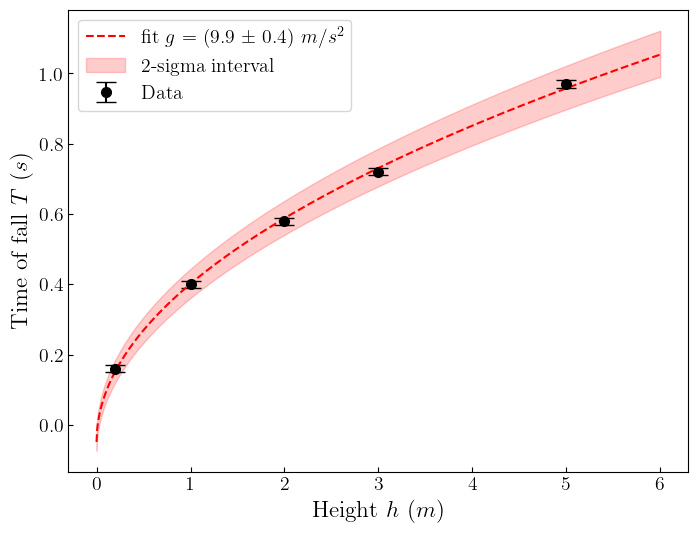

In [35]:
fig, ax = plt.subplots()
ax.errorbar(
    h,
    t,
    yerr=0.01,
    ls='None',
    c='k',
    marker='o',
    markersize=7,
    capsize=7,
    label='Data'
)

h_fit = np.linspace(0, 6, 1000)
ax.plot(h_fit, g_model_improved(h_fit, *popt), ls='--', c='r', 
        label=f"fit $g$ = ({g_fit:.1f} ± {g_fit_error:.1f}) $m/s^2$")

nstd = 2
popt_upper = popt + perr * nstd
popt_lower = popt - perr * nstd
t_upper = g_model_improved(h_fit, *popt_upper)
t_lower = g_model_improved(h_fit, *popt_lower)

ax.fill_between(h_fit, t_lower, t_upper,
                color='r',
                alpha=0.2,
                label=f'{nstd}-sigma interval',
                )

ax.set_xlabel("Height $h$ ($m$)")
ax.set_ylabel("Time of fall $T$ ($s$)")
ax.legend()

plt.show()


### d) Compare your answers for the three cases and discuss the difference.

When calculating $g$ seperately for all cases we get very close to the simple fit. This is because the fit pretty much achieves the same, although calculates the error differently. The result is at least very close. Using the final method we can also account for a systematic error in our measurement (the time delay $T_0$). This means we can get a far more accurate result for the value of $g$. we don't see this accuracy in the uncertainty on $g$, however due to taking account for a systematic error in our model, we are probably closer to the true value.

### e) Which of the two models provides a better fit to the data and why?

This discussion was also provided in the answer to exercise 3d. Even though it might not show in the uncertainty of our fit, the better fit to the data takes into account the systematic error in our experiment design. This model better describes the true relationship in our data.